# Homework 2

## Pair Programming Group Number: 37
## Members of Team: Chase Khan and Gregory Mika

#### Practicing using numpy to do math, and more visualizations

More fun using the numerical package, numpy, a touch of pandas, and exercising your math vocabulary. 

In [1]:
# Your imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

## Question 1 - Discrete PDF
Create a vector of 1000 random numbers from a Normal distribution with mean 5 and standard deviation 10 and plot the discrete probability density function using a histogram.  You should use [numpy random normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to create the vector. Always label your axes and give your plots titles (this holds for all questions). 

Text(0, 0.5, 'Probability')

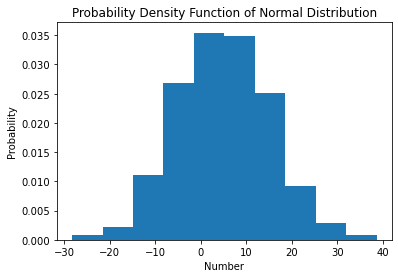

In [2]:
normal = np.random.normal(5, 10, 1000)
plt.hist(normal, density = True)
plt.title('Probability Density Function of Normal Distribution')
plt.xlabel('Number')
plt.ylabel('Probability')

## Question 2 - Discrete CDF

Create a discrete cumulative density function plot using the same vector as the last question using a line graph
Annotate the point, $x$, where 80% of the data < $x$ and 20% of the data is greater than $x$.  If can use the matplotlib pyplot function [plot](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html) to the line, and to draw a star at the point $x$.  Use the [legend](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.legend.html) function to annotate the graph. 

Text(0, 0.5, 'CDF(x)')

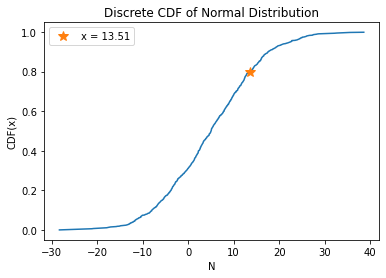

In [3]:
sorted_normal = np.sort(normal)
cdf_prob = np.arange(0, 1000)/1000
plt.plot(sorted_normal, cdf_prob)
plt.plot(sorted_normal[800], cdf_prob[800], '*', label = "x = " + "{:.2f}".format(sorted_normal[800]), markersize = 10)
plt.legend()
plt.title('Discrete CDF of Normal Distribution')
plt.xlabel('N')
plt.ylabel('CDF(x)')

## Question 3 - Univariate Analysis

Load in the data from melb_data.csv into a pandas DataFrame.  Create a box and whisker graph comparing the prices in the suburbs:
  - Reservoir         
  - Richmond          
  - Bentleigh East
  
You should use the [boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) function, with the parameter `by`. 

Text(0, 0.5, 'Price')

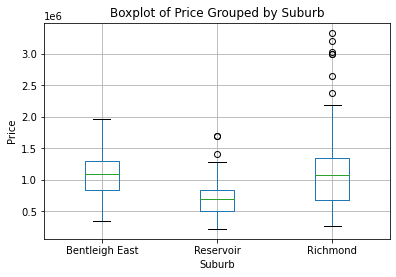

In [4]:
df = pd.read_csv('melb_data.csv', header='infer')
suburbs = df[ (df['Suburb'] == 'Reservoir') | (df['Suburb'] == 'Richmond') | (df['Suburb'] == 'Bentleigh East')]
boxplot = suburbs.boxplot(column = 'Price', by = 'Suburb')
plt.suptitle('')
plt.title('Boxplot of Price Grouped by Suburb')
plt.ylabel('Price')

## Question 4 - Rotation with Matrices

Consider the vectors:
  - $\alpha$ which begins at (0,0) and ends at (1,1)
  - $\beta$ which begins at (1,1) and ends at (0,1)
  
Draw $\alpha$ and $\beta$ using a line graph using a different color for each vector.

Now, using matrix multiplication rotate the vectors 45 degrees (clockwise or counter-clockwise, you choose!) and draw the result.  You must use numpy's [matmul](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html) to accomplish the rotation. Numpy also has functions for `sin` and `cos`.  You should also get [pi](https://numpy.org/doc/stable/reference/constants.html?highlight=pi#numpy.pi) from the numpy package. 

Text(0, 0.5, 'y')

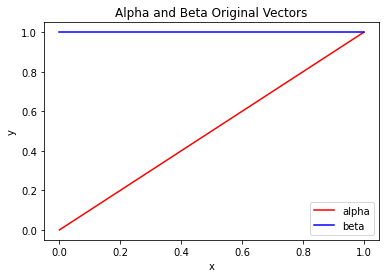

In [5]:
Ax = [0, 1]
Ay = [0, 1]
Bx = [1, 0]
By = [1, 1]
plt.plot(Ax, Ay, 'r', label = 'alpha')
plt.plot(Bx, By, 'b', label = 'beta')
plt.legend()
plt.title('Alpha and Beta Original Vectors')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

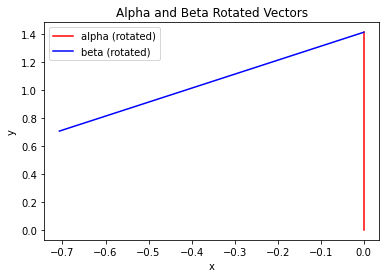

In [6]:
a_start = np.array([[0], [0]])
a_end = np.array([[1], [1]])
b_start = np.array([[1], [1]])
b_end = np.array([[0], [1]])
theta = np.pi/4 
rot = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
a_rot_start = np.matmul(rot, a_start)
a_rot_end = np.matmul(rot, a_end)
b_rot_start = np.matmul(rot, b_start)
b_rot_end = np.matmul(rot, b_end)
ax = [a_rot_start[0,0], a_rot_end[0,0]]
ay = [a_rot_start[1,0], a_rot_end[1, 0]]
bx = [b_rot_start[0,0], b_rot_end[0,0]]
by = [b_rot_start[1,0], b_rot_end[1, 0]]
plt.plot(ax, ay, 'r', label = 'alpha (rotated)')
plt.plot(bx, by, 'b', label = 'beta (rotated)')
plt.legend()
plt.title('Alpha and Beta Rotated Vectors')
plt.xlabel('x')
plt.ylabel('y')

## Question 5 - Solving Systems of Equations with Matrices

Consider the following system of equations:
  - $2x +  y + z = 5$
  - $4x - 6y     = -2$
  - $-2x + 7y + 2z = 9$
  
Convert the coefficients of the system of equations to a matrix, $A$, where the first column contains the $x$ coefficients, the second column contains the $y$ coefficients, and the third column contains the $z$ coefficients. 
Covert the values on the right hand side to a (3,1) vector, $b$, (make sure you keep all the numbers in order.  Now, solve for $(x,y,z)$ by inverting $A$ and multiplying by $b$, eg, $A^{-1} * b$. 

Use the numpy [linear algebra inverse function](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html) to find $A^{-1}$.

In [7]:
A = np.array([[2,1,1], [4, -6, 0], [-2, 7, 2]])
b = np.array([[5], [-2], [9]])
inv = np.linalg.inv(A)
sol = np.matmul(inv, b)
print('x = '+ str(int(sol[0][0])) + ', y = ' + str(int(sol[1][0])) + ', z = ' + str(int(sol[2][0])))

x = 1, y = 1, z = 2
